<a href="https://colab.research.google.com/github/cfreeman22/d212_data_mining_2/blob/main/D212_task2_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DATA Mining 2 TASK 2 PCA Analysis

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pylab as plt
%matplotlib inline

import seaborn as sns

# to scale the data using z-score
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
# to compute distances
from scipy.spatial.distance import cdist

# to perform k-means clustering and compute silhouette scores
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# to visualize the elbow curve and silhouette scores
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

import warnings
warnings.filterwarnings('ignore')

In [2]:
def treat_outliers(df, col):
    """
    Treats outliers in a variable
    df: dataframe
    col: dataframe column
    """
    Q1 = df[col].quantile(0.25)  # 25th quantile
    Q3 = df[col].quantile(0.75)  # 75th quantile
    IQR = Q3 - Q1
    Lower_Whisker = Q1 - 1.5 * IQR
    Upper_Whisker = Q3 + 1.5 * IQR

    # all the values smaller than Lower_Whisker will be assigned the value of Lower_Whisker
    # all the values greater than Upper_Whisker will be assigned the value of Upper_Whisker
    df[col] = np.clip(df[col], Lower_Whisker, Upper_Whisker)

    return df


def treat_outliers_all(df, col_list):
    """
    Treat outliers in a list of variables
    df: dataframe
    col_list: list of dataframe columns
    """
    for c in col_list:
        df = treat_outliers(df, c)

    return df

In [3]:
#reading the data
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
#Reading the data from my google drive.
df = pd.read_csv('/content/drive/My Drive/churn_clean.csv')

## Data Preeparation steps

In [5]:
df.dtypes

CaseOrder                 int64
Customer_id              object
Interaction              object
UID                      object
City                     object
State                    object
County                   object
Zip                       int64
Lat                     float64
Lng                     float64
Population                int64
Area                     object
TimeZone                 object
Job                      object
Children                  int64
Age                       int64
Income                  float64
Marital                  object
Gender                   object
Churn                    object
Outage_sec_perweek      float64
Email                     int64
Contacts                  int64
Yearly_equip_failure      int64
Techie                   object
Contract                 object
Port_modem               object
Tablet                   object
InternetService          object
Phone                    object
Multiple                 object
OnlineSe

In [5]:
# renaming the survey items columns
df = df.rename(columns={'Item1': 'TimelyResponse','Item2': 'TimelyFixes' , 'Item3': 'TimelyReplacements', 'Item4': 'Reliability',

                          'Item5': 'Options', 'Item6': 'RespectfulResponse', 'Item7': 'CourteousExchange', 'Item8': 'ActiveListening'})


In [6]:
# select all columns except float based
df2 = df.select_dtypes(exclude ='object')

# Dropping some cloums
cols_to_drop = ['CaseOrder','Zip', 'Lat','Lng']

df2 = df2.drop(cols_to_drop, axis = 1)

In [7]:
cont_cols =[]

for col in df.columns.to_list():
  if col in df2.columns.to_list():
    cont_cols.append(col)

In [8]:
cont_cols

['Population',
 'Children',
 'Age',
 'Income',
 'Outage_sec_perweek',
 'Email',
 'Contacts',
 'Yearly_equip_failure',
 'Tenure',
 'MonthlyCharge',
 'Bandwidth_GB_Year',
 'TimelyResponse',
 'TimelyFixes',
 'TimelyReplacements',
 'Reliability',
 'Options',
 'RespectfulResponse',
 'CourteousExchange',
 'ActiveListening']

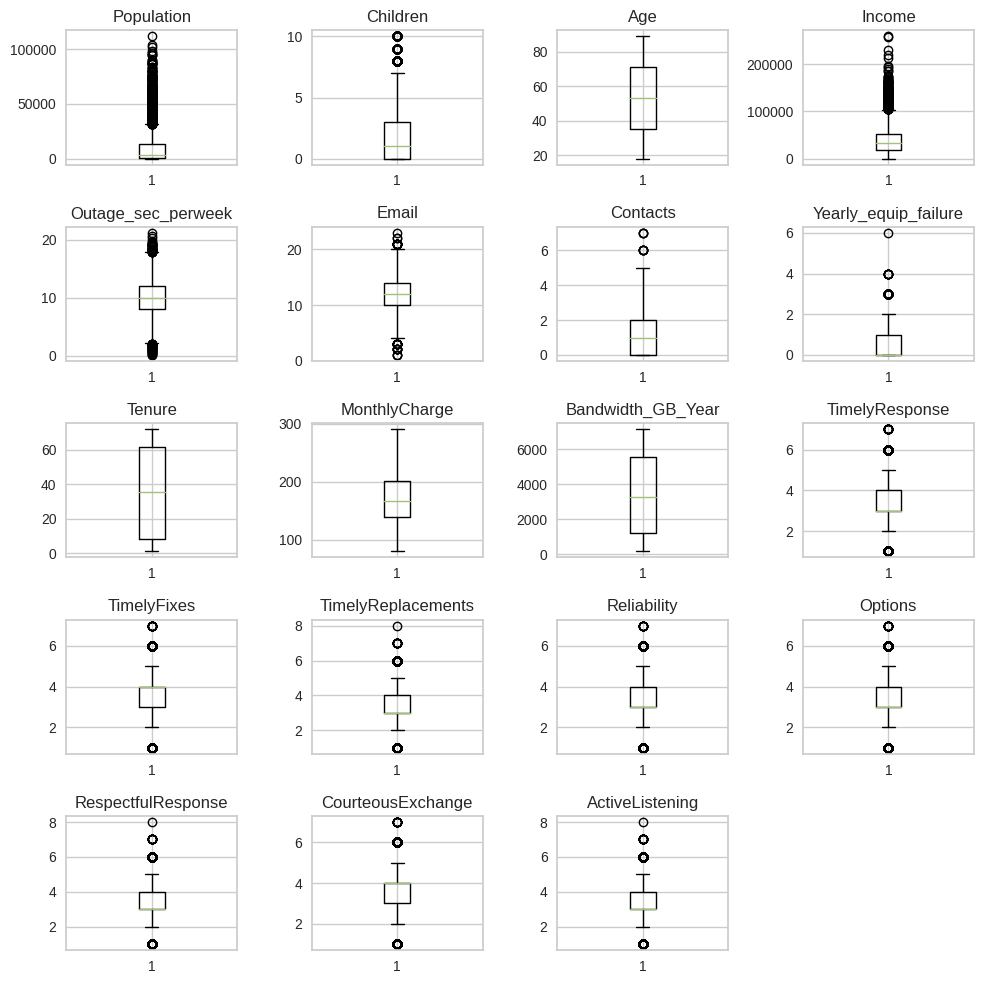

In [9]:

# Detecting all outliers in case we missed some in exploration

plt.figure(figsize=(10,10))

for i, variable in enumerate(cont_cols):
    plt.subplot(5, 4, i + 1)
    plt.boxplot(df2[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

In [10]:
#treating outliers
col_to_treat = ['Population','Children', 'Income', 'Outage_sec_perweek','Email','Contacts','Yearly_equip_failure','TimelyResponse',
                'TimelyFixes','TimelyReplacements','Reliability','Options','RespectfulResponse','CourteousExchange','ActiveListening']
df = treat_outliers_all(df2, col_to_treat)

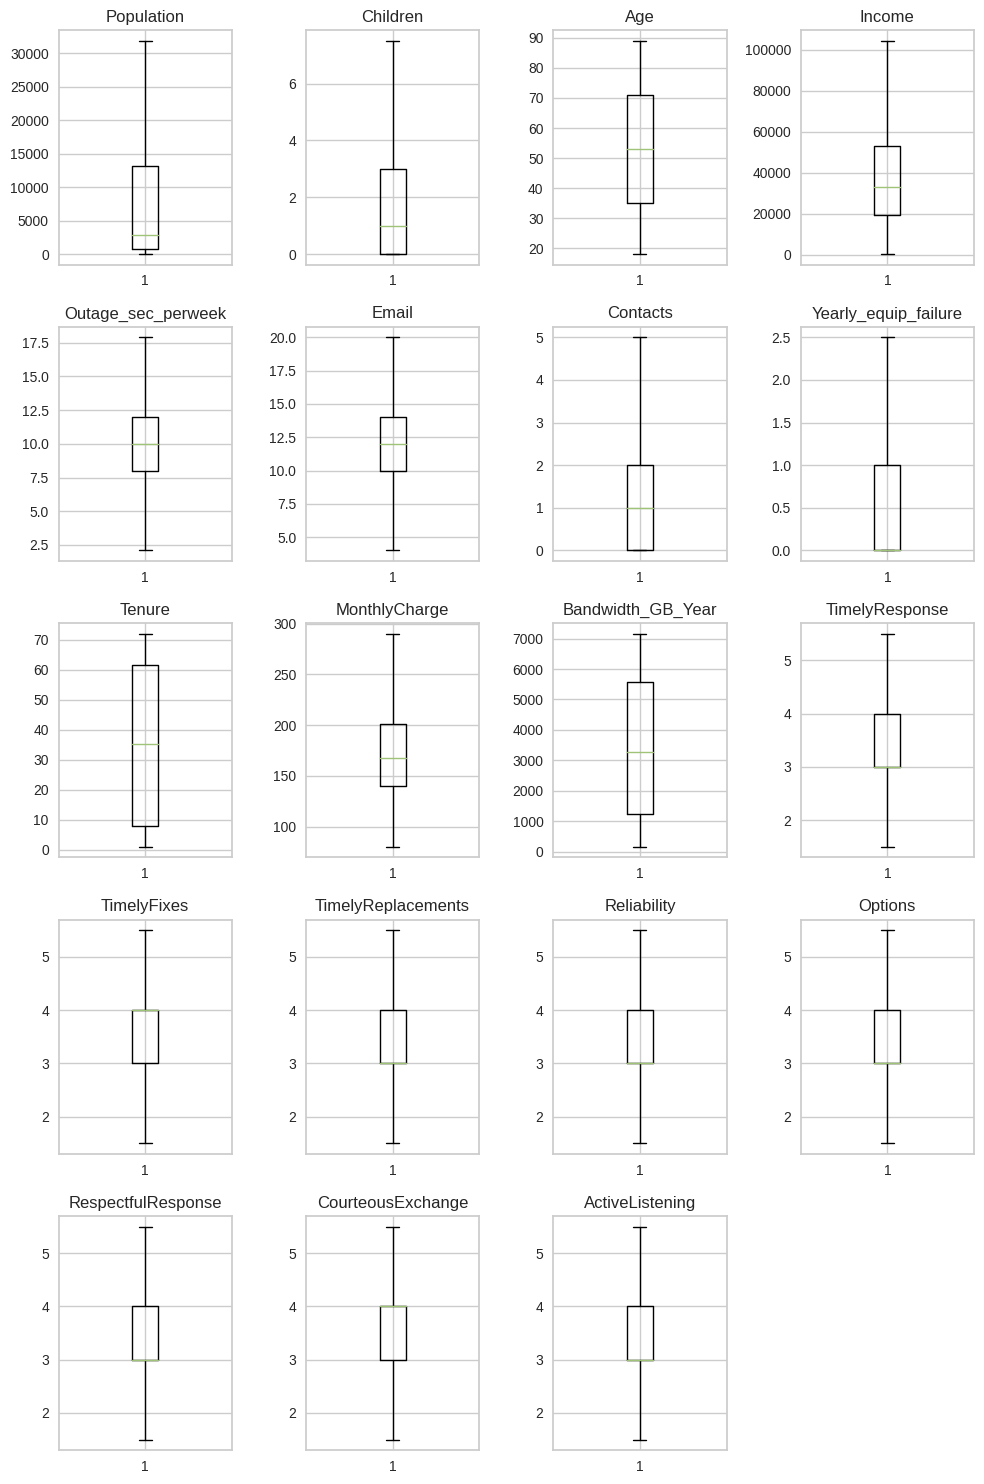

In [11]:

#checking if all outliers are treated
plt.figure(figsize=(10, 15))

for i, variable in enumerate(cont_cols):
    plt.subplot(5, 4, i + 1)
    plt.boxplot(df2[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()
     

In [ ]:
## DROP EITHER TENURE OR BANDWIDTH from previous analysis these two features were highly correlated
#df = df.drop('Bandwidth_GB_Year', axis = 1)
# Dropping  categorical columns ...........

In [ ]:
#saving the data for the PCA model
#df.to_csv('pca_df.csv')

## Standardizing the data

In [ ]:
# scaling the data before performing PCA
#XScaled=X.apply(zscore)
#XScaled.head()

In [19]:

subset = df2.copy()
df_scaled = subset.apply(zscore)
#df_scaled.to_csv('pca_df.csv')

In [20]:
df_scaled.head()

,Population,Children,Age,Income,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Tenure,MonthlyCharge,Bandwidth_GB_Year,TimelyResponse,TimelyFixes,TimelyReplacements,Reliability,Options,RespectfulResponse,CourteousExchange,ActiveListening
0,-0.790816,-1.020751,0.720925,-0.408312,-0.683933,-0.670329,-1.010189,0.991774,-1.048746,-0.003943,-1.138487,1.537131,1.525657,1.551261,-0.510133,0.522576,0.514403,-0.521063,0.519234
1,0.190071,-0.520052,-1.259957,-0.676414,0.574063,-0.005847,-1.010189,0.991774,-1.262001,1.630326,-1.185876,-0.497726,0.506344,-0.496473,-0.510133,0.522576,-0.502706,0.505460,0.519234
2,-0.442398,0.982047,-0.148730,-1.149309,0.254124,-1.002570,-1.010189,0.991774,-0.709940,-0.295225,-0.612138,0.519703,0.506344,-1.520340,0.516188,0.522576,-0.502706,-0.521063,-0.505502
3,0.512101,-0.520052,-0.245359,-0.785088,1.660879,0.990875,1.024227,-0.640239,-0.659524,-1.226521,-0.561857,0.519703,0.506344,0.527394,-1.536453,1.549651,0.514403,-0.521063,-0.505502
4,0.275455,-1.020751,1.445638,0.041790,-0.626762,1.323116,1.024227,0.991774,-1.242551,-0.528086,-1.428184,0.519703,0.506344,0.527394,-0.510133,0.522576,0.514403,0.505460,1.543970


## Covariance matrix

In [12]:
from sklearn.preprocessing import RobustScaler

In [13]:
df3 = df2.copy()
df4 = df2.copy()

In [14]:
robust_scaler = RobustScaler()

# calculate median and IQR  
robust_scaler.fit(df3)

# scale all data points using median and IQR
robust_scaled_data = robust_scaler.transform(df3)

In [15]:
standard_scaler = StandardScaler()
# combine both fit & transform into one call
standard_scaled_data = standard_scaler.fit_transform(df3)


In [25]:
standard_scaled_data.head()

AttributeError: ignored

In [16]:
# dataframe with both standard and robust scaled values
scaled_values = pd.DataFrame({
    #'zsore' : df_scaled.reshape(-1),
    'Standard': standard_scaled_data.reshape(-1),
    'Robust': robust_scaled_data.reshape(-1)
})

In [17]:
scaled_values

,Standard,Robust
0,-0.790816,-0.231094
1,-1.020751,-0.333333
2,0.720925,0.416667
3,-0.408312,-0.135462
4,-0.683933,-0.516350
...,...,...
189995,-0.510133,0.000000
189996,-0.504499,0.000000
189997,-0.502706,0.000000
189998,0.505460,0.000000


In [19]:
standard_scaled_data

array([[-0.67340479, -0.97233791,  0.72092524, ...,  0.48638938,
        -0.49540563,  0.49038392],
       [ 0.04777153, -0.50659192, -1.25995716, ..., -0.48116458,
         0.47693123,  0.49038392],
       [-0.41723753,  0.89064606, -0.14873045, ..., -0.48116458,
        -0.49540563, -0.48182845],
       ...,
       [-0.64790585, -0.50659192, -0.24535886, ...,  0.48638938,
         0.47693123,  1.46259628],
       [ 1.78897441, -0.50659192, -0.6801867 , ..., -0.48116458,
         1.44926808,  0.49038392],
       [ 0.17138592, -0.50659192, -1.21164295, ..., -0.48116458,
         0.47693123, -2.42625317]])

In [22]:
covMatrix = np.cov(robust_scaled_data,rowvar=False)
print(covMatrix)

[[ 7.28783070e-01 -4.39567356e-03  6.00987857e-03 -7.51524991e-03
   4.74006445e-03  1.12966652e-02  3.56827965e-03 -3.56897723e-03
  -3.68873370e-03 -1.34501104e-03 -3.99451949e-03  2.57147443e-03
  -5.40966504e-04 -4.37672253e-03 -1.26793305e-02  4.47824237e-03
   1.30894300e-03 -1.21156765e-02  9.40844864e-03]
 [-4.39567356e-03  4.43247789e-01 -1.06365281e-02  5.08366754e-03
   2.07973820e-03  1.54763476e-03 -7.10626313e-03  3.46288129e-03
  -1.64402850e-03 -3.96902316e-03  8.52702354e-03  7.53155982e-03
   9.33406257e-03  7.61281128e-04 -1.15381480e-02  6.05100510e-04
  -2.00112095e-03 -1.03968397e-03 -4.41412308e-03]
 [ 6.00987857e-03 -1.06365281e-02  3.30589273e-01 -1.30441365e-03
  -3.51773934e-03  9.30094121e-04  4.27182941e-03  2.33339112e-03
   4.81967350e-03  4.36005215e-03 -4.25317720e-03 -3.21569046e-03
   3.95303975e-03 -1.79923992e-03  6.95295307e-03 -4.12985965e-03
   6.21453256e-03  2.39341045e-03  8.26263960e-03]
 [-7.51524991e-03  5.08366754e-03 -1.30441365e-03  5.65

In [21]:
covMatrix = np.cov(df_scaled,rowvar=False)
print(covMatrix)

[[ 1.00010001e+00 -7.73475279e-03  1.22451924e-02 -1.17103819e-02
   7.41808176e-03  1.75867561e-02  8.50396032e-03 -6.82322812e-03
  -8.75321209e-03 -2.22926814e-03 -9.31440589e-03  3.06484649e-03
  -6.45952536e-04 -5.24946643e-03 -1.52441073e-02  5.38805835e-03
   1.55959020e-03 -1.45693078e-02  1.12941237e-02]
 [-7.73475279e-03  1.00010001e+00 -2.77891751e-02  1.01573548e-02
   4.17341802e-03  3.08944030e-03 -2.17159821e-02  8.48905926e-03
  -5.00236456e-03 -8.43521084e-03  2.54955230e-02  1.15103173e-02
   1.42914663e-02  1.17081172e-03 -1.77876111e-02  9.33529535e-04
  -3.05730628e-03 -1.60312890e-03 -6.79445784e-03]
 [ 1.22451924e-02 -2.77891751e-02  1.00010001e+00 -3.01785053e-03
  -8.17383342e-03  2.14989446e-03  1.51157953e-02  6.62351329e-03
   1.69809712e-02  1.07295845e-02 -1.47251203e-02 -5.69056662e-03
   7.00835629e-03 -3.20412895e-03  1.24116560e-02 -7.37759392e-03
   1.09939305e-02  4.27329810e-03  1.47267899e-02]
 [-1.17103819e-02  1.01573548e-02 -3.01785053e-03  1.00

In [33]:
pca = PCA(n_components=5)
pca.fit(df_scaled)

PCA(n_components=5)

In [34]:
print(pca.explained_variance_)

[2.9323858  1.99660155 1.62686493 1.05822306 1.02654498]


In [35]:
print(pca.components_)

[[-2.47710715e-03  2.38170578e-03  6.45243042e-03  1.63975151e-03
  -1.80092012e-02  7.41878635e-03 -8.47042721e-03 -8.14963554e-03
  -1.77867359e-02  9.43462237e-04 -1.83334849e-02  4.59153795e-01
   4.33594233e-01  3.99890489e-01  1.46237388e-01 -1.77226787e-01
   4.04288948e-01  3.58381517e-01  3.08792514e-01]
 [-1.26194907e-02  1.55767912e-02  1.41097088e-04  3.61934133e-03
   4.12470153e-03 -2.03711238e-02  2.75305739e-03  1.60478996e-02
   7.02739633e-01  3.98866710e-02  7.04243610e-01  2.99046430e-02
   3.87606456e-02  3.31978866e-02 -3.53175975e-02  5.11098491e-02
  -5.35919478e-03  3.53990959e-03 -9.76243128e-03]
 [-1.14758632e-02 -4.31529608e-02  1.91210911e-02 -2.62442053e-02
   2.26163171e-02  3.62465073e-03  1.39847416e-02 -2.11856734e-02
   5.80887696e-02  7.10383264e-03  5.69447791e-02 -2.82019001e-01
  -2.83021368e-01 -2.87192046e-01  5.71794544e-01 -5.76217081e-01
   1.70294184e-01  1.89680604e-01  1.51809694e-01]
 [-3.46349456e-01  4.32060221e-01 -4.81955691e-01  2.90

In [36]:
print(pca.explained_variance_ratio_)

[0.15432066 0.10507378 0.08561591 0.05569038 0.05402328]


In [ ]:
# creating a dataframe of the scaled data
#subset_scaled_df = pd.DataFrame(df_scaled, columns=subset.columns)

## PCA
## finding the number of components
 

Text(0.5, 1.0, 'Selecting k with the Elbow Method')

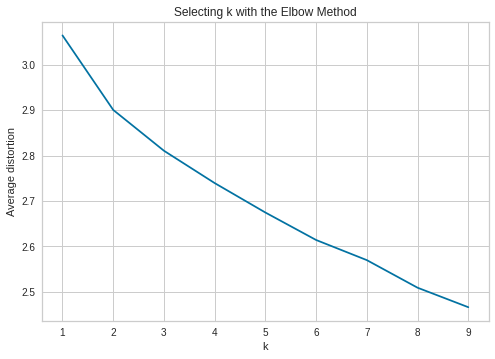

In [ ]:
 #Finding optimal no. of clusters
#from scipy.spatial.distance import cdist
clusters=range(1,10)
meanDistortions=[]

for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(subset_scaled_df)
    prediction=model.predict(subset_scaled_df)
    meanDistortions.append(sum(np.min(cdist(subset_scaled_df, model.cluster_centers_, 'euclidean'), axis=1)) / subset_scaled_df.shape[0])


plt.plot(clusters, meanDistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method')

Though the bend is not coming out clearly as there are many bends, let us look at 2, 3, 4 and 5 clusters

In [ ]:
# Let us first start with K = 2
final_model=KMeans(2)
final_model.fit(subset_scaled_df)
prediction=final_model.predict(subset_scaled_df)

#Append the prediction 
subset["GROUP"] = prediction
subset_scaled_df["GROUP"] = prediction
print("Groups Assigned : \n")
subset.head()

Groups Assigned : 



,Population,Children,Age,Income,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Tenure,MonthlyCharge,GROUP
0,38,0,68,28561.99,7.978323,10,0,1,6.795513,172.455519,1
1,10446,1,27,21704.77,11.699080,12,0,1,1.156681,242.632554,1
2,3735,4,50,9609.57,10.752800,9,0,1,15.754144,159.947583,1
3,13863,1,48,18925.23,14.913540,15,2,0,17.087227,119.956840,1
4,11352,0,83,40074.19,8.147417,16,2,1,1.670972,149.948316,1


In [ ]:
df_clust = subset.groupby(['GROUP'])
df_clust.mean()

,Population,Children,Age,Income,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Tenure,MonthlyCharge
GROUP,,,,,,,,,,
0,9759.341732,2.077385,53.486703,39852.649104,10.012358,11.980804,0.997600,0.403319,59.918792,172.462567
1,9753.781956,2.098020,52.669934,39761.186145,9.991334,12.051210,0.990798,0.392679,9.123425,172.787130


array([[<Axes: title={'center': 'Age'}, xlabel='[GROUP]'>,
        <Axes: title={'center': 'Children'}, xlabel='[GROUP]'>,
        <Axes: title={'center': 'Contacts'}, xlabel='[GROUP]'>,
        <Axes: title={'center': 'Email'}, xlabel='[GROUP]'>,
        <Axes: title={'center': 'Income'}, xlabel='[GROUP]'>],
       [<Axes: title={'center': 'MonthlyCharge'}, xlabel='[GROUP]'>,
        <Axes: title={'center': 'Outage_sec_perweek'}, xlabel='[GROUP]'>,
        <Axes: title={'center': 'Population'}, xlabel='[GROUP]'>,
        <Axes: title={'center': 'Tenure'}, xlabel='[GROUP]'>,
        <Axes: title={'center': 'Yearly_equip_failure'}, xlabel='[GROUP]'>]],
      dtype=object)

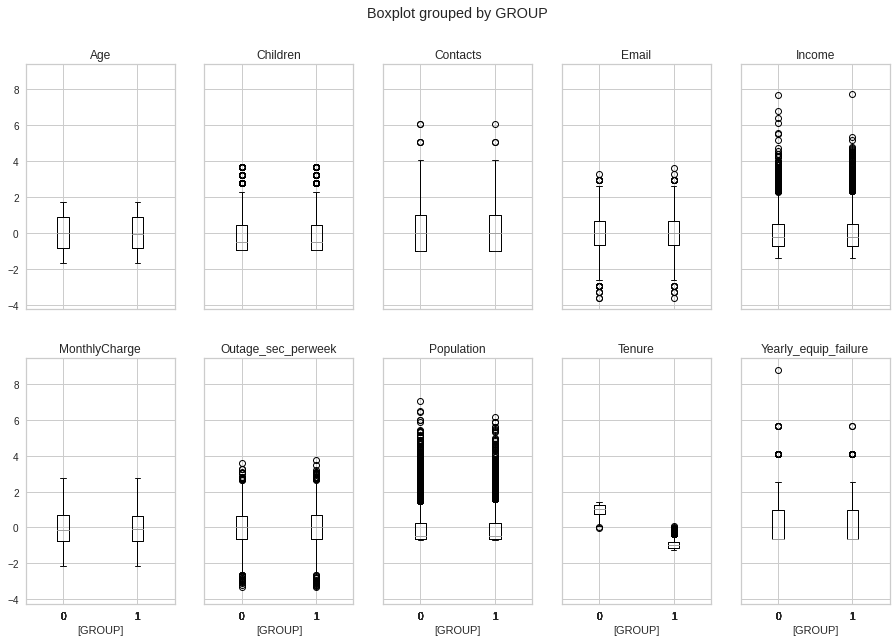

In [ ]:
subset_scaled_df.boxplot(by='GROUP', layout = (2,5),figsize=(15,10))

In [ ]:
# Let us first start with K = 3
final_model=KMeans(3)
final_model.fit(subset_scaled_df)
prediction=final_model.predict(subset_scaled_df)

#Append the prediction 
subset["GROUP"] = prediction
subset_scaled_df["GROUP"] = prediction
print("Groups Assigned : \n")
subset.head()

Groups Assigned : 



,Population,Children,Age,Income,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Tenure,MonthlyCharge,GROUP
0,38,0,68,28561.99,7.978323,10,0,1,6.795513,172.455519,0
1,10446,1,27,21704.77,11.699080,12,0,1,1.156681,242.632554,0
2,3735,4,50,9609.57,10.752800,9,0,1,15.754144,159.947583,0
3,13863,1,48,18925.23,14.913540,15,2,0,17.087227,119.956840,0
4,11352,0,83,40074.19,8.147417,16,2,1,1.670972,149.948316,0


In [ ]:
df_clust2 = subset.groupby(['GROUP'])
df_clust2.mean()

,Population,Children,Age,Income,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Tenure,MonthlyCharge
GROUP,,,,,,,,,,
0,5180.918578,2.096560,52.310092,40013.227972,9.980153,12.011239,0.984404,0.390596,9.086578,172.930508
1,5145.451097,2.074954,53.414305,40017.180882,10.008057,11.956581,0.992916,0.404707,60.103383,172.586433
2,41503.421677,2.101266,54.565665,38367.413141,10.055188,12.238133,1.032437,0.400316,33.727847,171.703259


array([[<Axes: title={'center': 'Age'}, xlabel='[GROUP]'>,
        <Axes: title={'center': 'Children'}, xlabel='[GROUP]'>,
        <Axes: title={'center': 'Contacts'}, xlabel='[GROUP]'>,
        <Axes: title={'center': 'Email'}, xlabel='[GROUP]'>,
        <Axes: title={'center': 'Income'}, xlabel='[GROUP]'>],
       [<Axes: title={'center': 'MonthlyCharge'}, xlabel='[GROUP]'>,
        <Axes: title={'center': 'Outage_sec_perweek'}, xlabel='[GROUP]'>,
        <Axes: title={'center': 'Population'}, xlabel='[GROUP]'>,
        <Axes: title={'center': 'Tenure'}, xlabel='[GROUP]'>,
        <Axes: title={'center': 'Yearly_equip_failure'}, xlabel='[GROUP]'>]],
      dtype=object)

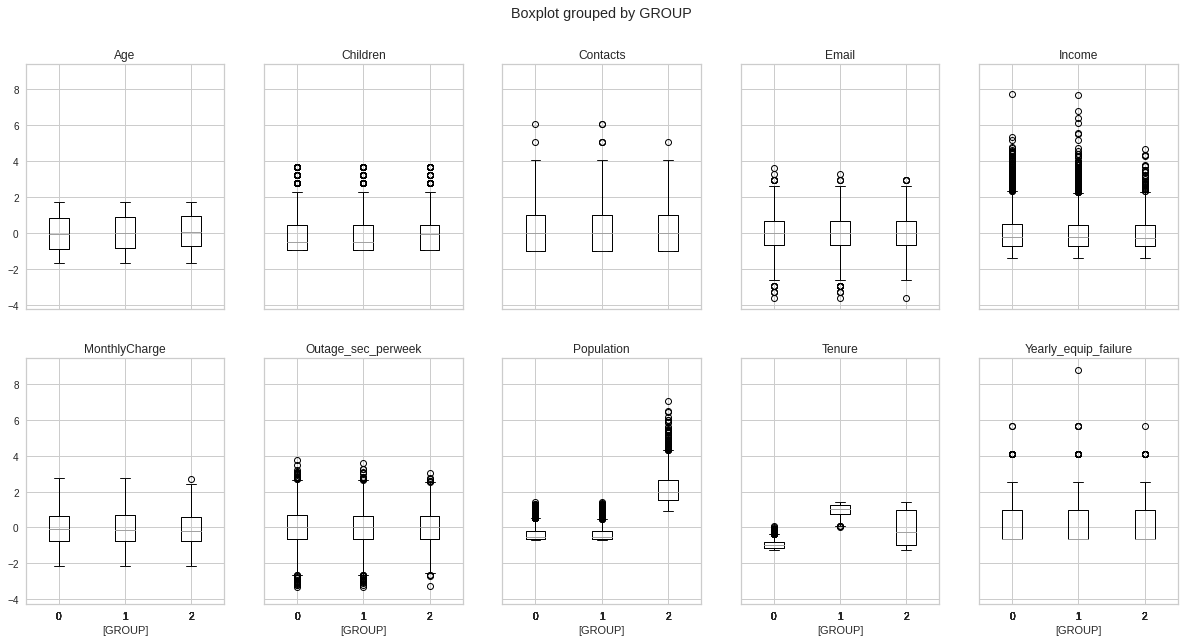

In [ ]:
subset_scaled_df.boxplot(by='GROUP', layout = (2,5),figsize=(20,10))

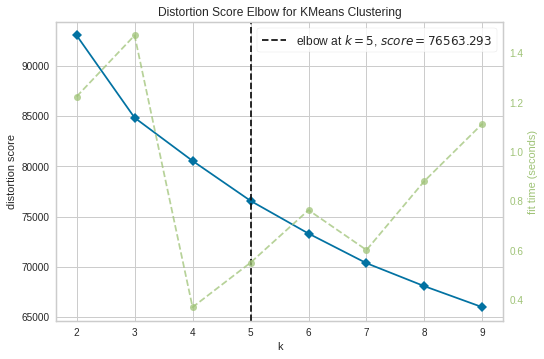

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
model = KMeans(random_state=1)
visualizer = KElbowVisualizer(model, k=(2, 10), timings=True)
visualizer.fit(subset_scaled_df)  # fit the data to the visualizer
visualizer.show()  # finalize and render figure

In [ ]:
sil_score = []
cluster_list = range(2, 10)
for n_clusters in cluster_list:
    clusterer = KMeans(n_clusters=n_clusters, random_state=1)
    preds = clusterer.fit_predict((subset))
    score = silhouette_score(subset_scaled_df, preds)
    sil_score.append(score)
    print("For n_clusters = {}, the silhouette score is {})".format(n_clusters, score))

For n_clusters = 2, the silhouette score is 0.08438545120275227)
For n_clusters = 3, the silhouette score is 0.03639756063392458)
For n_clusters = 4, the silhouette score is 0.051046737142227835)
For n_clusters = 5, the silhouette score is 0.03468268465621968)
For n_clusters = 6, the silhouette score is 0.025260292060299325)
For n_clusters = 7, the silhouette score is 0.016142563230686732)
For n_clusters = 8, the silhouette score is 0.01729307266765798)
For n_clusters = 9, the silhouette score is 0.014631831329175912)


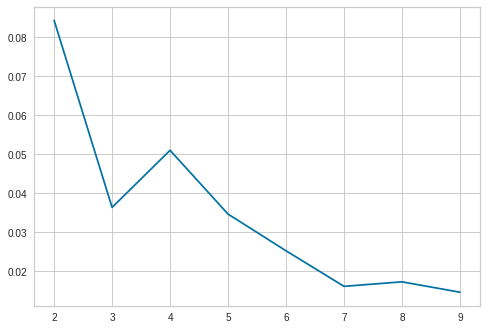

In [ ]:
plt.plot(cluster_list, sil_score)
plt.show()

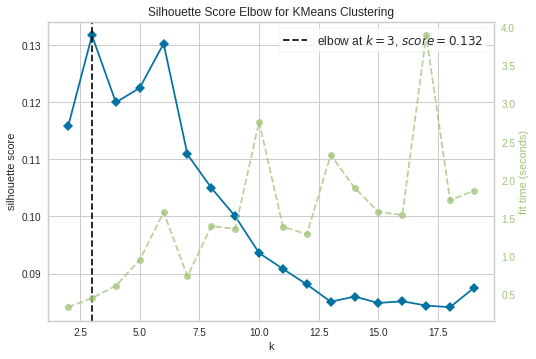

<Axes: title={'center': 'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [ ]:
model = KMeans(random_state=1)
visualizer = KElbowVisualizer(model, k=(2, 20), metric="silhouette", timings=True)
visualizer.fit(subset_scaled_df)  # fit the data to the visualizer
visualizer.show()  # finalize and render figure

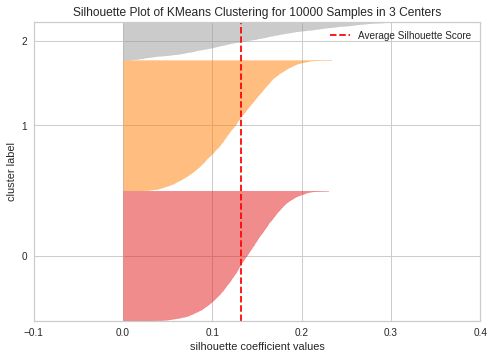

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 10000 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [ ]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(3, random_state=1))
visualizer.fit(subset_scaled_df)
visualizer.show()

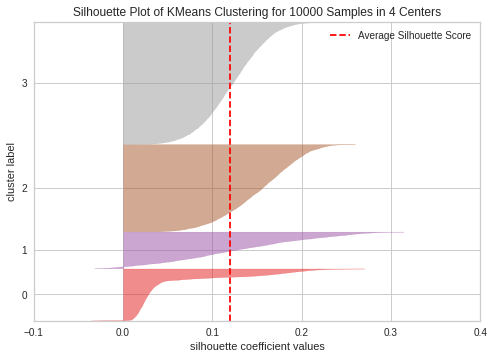

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 10000 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [ ]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(4, random_state=1))
visualizer.fit(subset_scaled_df)
visualizer.show()

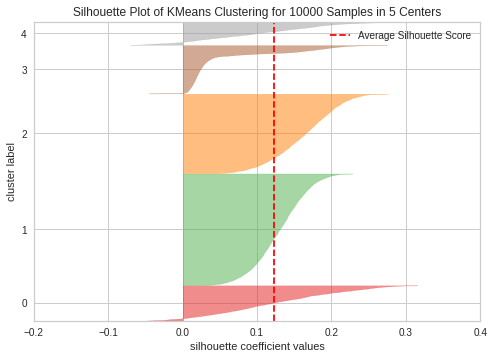

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 10000 Samples in 5 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [ ]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(5, random_state=1))
visualizer.fit(subset_scaled_df)
visualizer.show()

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=0)
subset['cluster'] = kmeans.fit_predict(subset[['Tenure', 'Outage_sec_perweek']])
# get centroids
centroids = kmeans.cluster_centers_
cen_x = [i[0] for i in centroids] 
cen_y = [i[1] for i in centroids]
## add to df
subset['cen_x'] = subset.cluster.map({0:cen_x[0], 1:cen_x[1], 2:cen_x[2]})
subset['cen_y'] = subset.cluster.map({0:cen_y[0], 1:cen_y[1], 2:cen_x[2]})
# define and map colors
colors = ['#DF2020', '#81DF20', '#2095DF']
subset['c'] = subset.cluster.map({0:colors[0], 1:colors[1], 2:colors[2]})

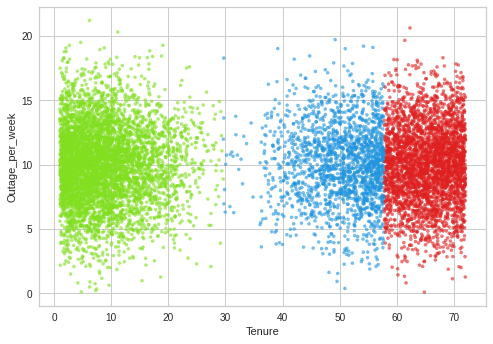

In [ ]:
plt.scatter(subset.Tenure, subset.Outage_sec_perweek, c=subset.c, alpha = 0.6, s=10)
plt.xlabel('Tenure')
plt.ylabel('Outage_per_week')

plt.legend()

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=0)
subset['cluster'] = kmeans.fit_predict(subset[['Tenure', 'MonthlyCharge']])
# get centroids
centroids = kmeans.cluster_centers_
cen_x = [i[0] for i in centroids] 
cen_y = [i[1] for i in centroids]
## add to df
subset['cen_x'] = subset.cluster.map({0:cen_x[0], 1:cen_x[1], 2:cen_x[2]})
subset['cen_y'] = subset.cluster.map({0:cen_y[0], 1:cen_y[1], 2:cen_x[2]})
# define and map colors
colors = ['#DF2020', '#81DF20', '#2095DF']
subset['c'] = subset.cluster.map({0:colors[0], 1:colors[1], 2:colors[2]})

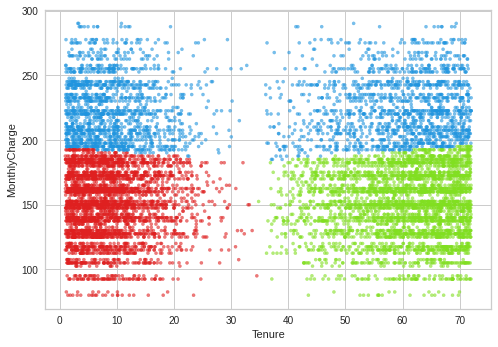

In [ ]:
plt.scatter(subset.Tenure, subset.MonthlyCharge, c=subset.c, alpha = 0.6, s=10)
plt.xlabel('Tenure')
plt.ylabel('MonthlyCharge')

plt.legend()

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=0)
subset['cluster'] = kmeans.fit_predict(subset[['Tenure', 'Income']])
# get centroids
centroids = kmeans.cluster_centers_
cen_x = [i[0] for i in centroids] 
cen_y = [i[1] for i in centroids]
## add to df
subset['cen_x'] = subset.cluster.map({0:cen_x[0], 1:cen_x[1], 2:cen_x[2]})
subset['cen_y'] = subset.cluster.map({0:cen_y[0], 1:cen_y[1], 2:cen_x[2]})
# define and map colors
colors = ['#DF2020', '#81DF20', '#2095DF']
subset['c'] = subset.cluster.map({0:colors[0], 1:colors[1], 2:colors[2]})

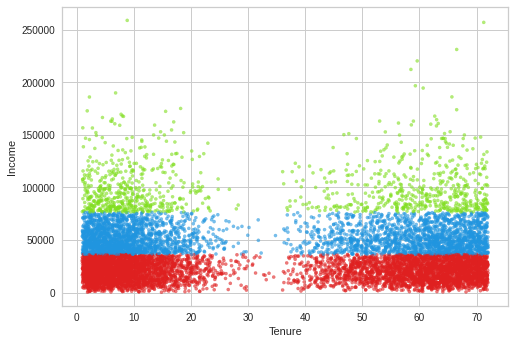

In [ ]:
plt.scatter(subset.Tenure, subset.Income, c=subset.c, alpha = 0.6, s=10)
plt.xlabel('Tenure')
plt.ylabel('Income')

plt.legend()